In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score

In [23]:
data = pd.read_csv('chocolate_bars.csv')
data.head()

,id,manufacturer,company_location,year_reviewed,bean_origin,bar_name,cocoa_percent,num_ingredients,ingredients,review,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.0,"B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,3.0,"B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.0,"B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68.0,3.0,"B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72.0,3.0,"B,S,C","fatty, earthy, moss, nutty,chalky",3.00


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2530 non-null   int64  
 1   manufacturer      2530 non-null   object 
 2   company_location  2530 non-null   object 
 3   year_reviewed     2530 non-null   int64  
 4   bean_origin       2530 non-null   object 
 5   bar_name          2530 non-null   object 
 6   cocoa_percent     2530 non-null   float64
 7   num_ingredients   2443 non-null   float64
 8   ingredients       2443 non-null   object 
 9   review            2530 non-null   object 
 10  rating            2530 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 217.5+ KB


In [25]:
data.corr()

,id,year_reviewed,cocoa_percent,num_ingredients,rating
id,1.000000,0.993126,0.015835,-0.356845,0.113398
year_reviewed,0.993126,1.000000,0.016484,-0.362956,0.116256
cocoa_percent,0.015835,0.016484,1.000000,-0.187468,-0.146690
num_ingredients,-0.356845,-0.362956,-0.187468,1.000000,-0.098834
rating,0.113398,0.116256,-0.146690,-0.098834,1.000000


In [26]:
data.isna().sum()

id                   0
manufacturer         0
company_location     0
year_reviewed        0
bean_origin          0
bar_name             0
cocoa_percent        0
num_ingredients     87
ingredients         87
review               0
rating               0
dtype: int64

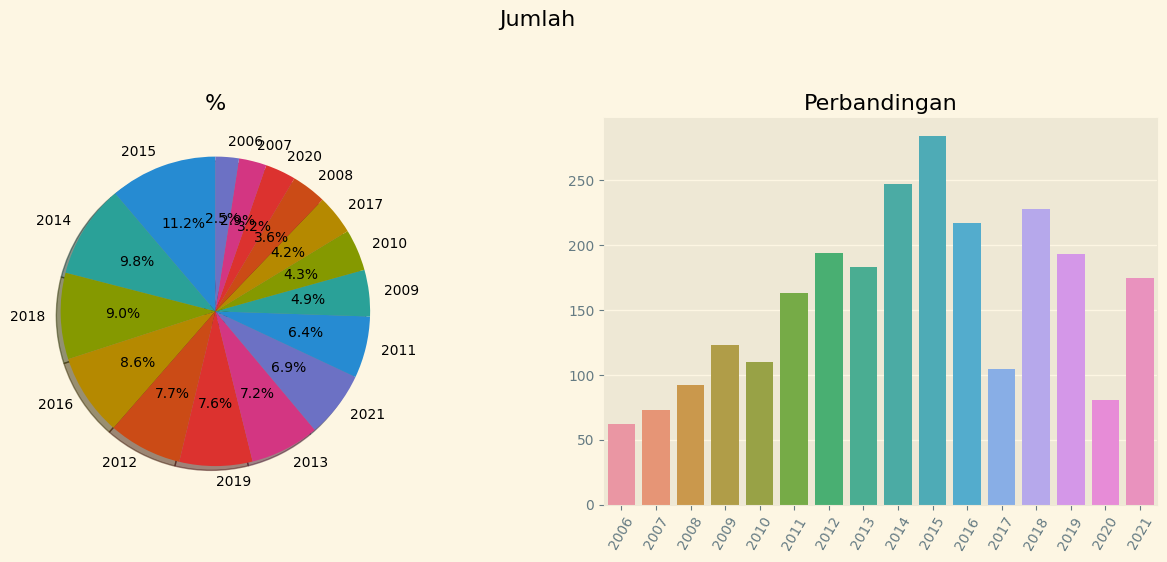

In [27]:
plt.style.use('Solarize_Light2')

Kategori = data["year_reviewed"].value_counts().reset_index()

fig, ax = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout(pad=5.0)

ax[0].pie(Kategori['year_reviewed'],labels=Kategori['index'],startangle=90,autopct='%.1f%%',shadow=True)
ax[0].title.set_text("%")


X_index = list(Kategori['index'])
y_species = list(Kategori['year_reviewed'])
sns.barplot(x=X_index,y=y_species,ax=ax[1])
ax[1].title.set_text("Perbandingan")

fig.subplots_adjust(top=0.8)
plt.xticks(rotation=60)
plt.suptitle("Jumlah",size=16)
plt.show()

<Figure size 2000x1500 with 0 Axes>

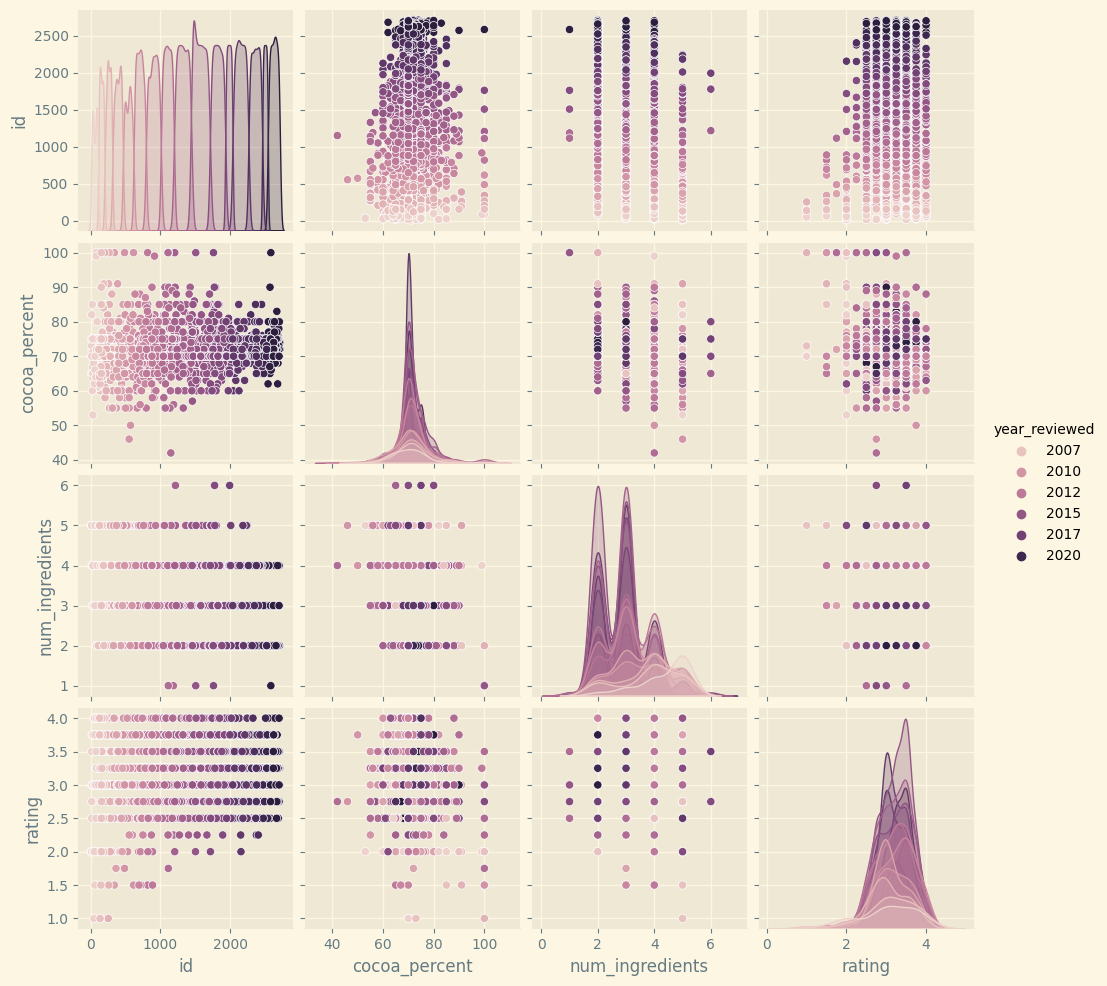

In [29]:
plt.figure(figsize=(20,15))
sns.pairplot(data,hue="year_reviewed")
plt.show()